### Load Dataset

In [142]:
import pandas as pd
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [143]:
file_path = os.path.join(os.getcwd(),"nyc_311_2020_incidents.csv")
df = pd.read_csv(file_path, dtype=str)

In [144]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Boruogh,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,40990076,11/20/2018 11:18:04 AM,11/21/2018 02:00:41 PM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,11101,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7580151,-73.9385755,"(40.7580151, -73.9385755)"
1,46920293,07/20/2020 10:51:12 AM,09/05/2020 12:32:48 PM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11234,1749 EAST 31 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.61146397103902,-73.93943433010804,"(40.61146397103902, -73.93943433010804)"
2,46893148,07/17/2020 09:33:04 AM,NaN,DPR,Department of Parks and Recreation,Dead/Dying Tree,Planted More Than 2 Years Ago,Street,11210,1321 EAST 35 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.62179897642533,-73.9410855790107,"(40.62179897642533, -73.9410855790107)"
3,46930483,07/21/2020 02:13:58 PM,09/05/2020 01:37:31 PM,MAYORâS OFFICE OF SPECIAL ENFORCEMENT,Mayorâs Office of Special Enforcement,NonCompliance with Phased Reopening,Business not in compliance,Store/Commercial,11210,2704 GLENWOOD ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.633718643537684,-73.9507199410522,"(40.633718643537684, -73.9507199410522)"
4,46997111,07/27/2020 12:56:33 PM,09/05/2020 08:51:14 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11354,151-23 28 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77273372358884,-73.81266028241241,"(40.77273372358884, -73.81266028241241)"


In [145]:
len(df)

1887578

In [146]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Boruogh', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

We probably will want to focus on the Complaint Type and the Descriptor columns

### Task 1: Noise

In [147]:
df['Mentions Noise'] = df['Complaint Type'].apply(lambda cause: 'Noise' in cause)

In [148]:
df[df['Mentions Noise'] == True]['Complaint Type'].unique()

array(['Noise - Residential', 'Noise - Street/Sidewalk',
       'Noise - Vehicle', 'Noise - Park', 'Noise - Commercial',
       'Noise - House of Worship', 'Noise', 'Noise - Helicopter',
       'Collection Truck Noise'], dtype=object)

In [149]:
df[df['Mentions Noise'] == True]['Descriptor'].unique()

array(['Loud Music/Party', 'Car/Truck Music', 'Loud Talking',
       'Engine Idling', 'Banging/Pounding',
       'Noise: Construction Before/After Hours (NM1)',
       'Noise:  lawn care equipment (NCL)', 'Noise: Alarms (NR3)',
       'Noise, Barking Dog (NR5)', 'Noise: Construction Equipment (NC1)',
       'Other', 'Car/Truck Horn', 'Noise: Jack Hammering (NC2)',
       'Loud Television', 'Noise: Private Carting Noise (NQ1)',
       'Noise: air condition/ventilation equipment (NV1)',
       'Noise, Other Animals (NR6)', 'Noise: lawn care equipment (NCL)',
       'Noise: Boat(Engine,Music,Etc) (NR10)',
       'Noise: Manufacturing Noise (NK1)', 'Noise, Ice Cream Truck (NR4)',
       'Noise: Other Noise Sources (Use Comments) (NZZ)', 'NYPD',
       'News Gathering', nan,
       'Noise: Loud Music/Daytime (Mark Date And Time) (NN1)',
       '21 Collection Truck Noise',
       'Noise: Loud Music From Siebel System - For Dep Internal Use Only (NP21)'],
      dtype=object)

Prompt: The mayor wants to know if noise issues tend to stem from different causes across the year.

Version 1 of question:  
Noise complaints in New York City in 2020.

Version 2 of question:  
Complaint calls from citizens of NYC in 2020 regarding disrupting noise levels.

Version 3 of question:  
Complaints from citizens of NYC in 2020 regarding disrupting noise levels at different times of year.

Version 4 of question:  
Differing causes of noise complaints in NYC regarding disrupting noise levels throughout different times of the year (e.g. seasons) in 2020.

**Plan: use groupby to group the causes of noise complaints by complaint type then by time of year/month**

In [150]:
sub_df = df.loc[df['Mentions Noise'] == True]

In [151]:
sub_df['Month'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%B')

C:\Users\alann\AppData\Local\Temp\ipykernel_14452\2147443337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Month'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%B')


In [152]:
sub_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Mentions Noise,Month
94,46820362,07/11/2020 11:18:32 PM,07/12/2020 02:39:08 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,NaN,11234,EAST 56 STREET,...,NaN,NaN,NaN,NaN,NaN,40.1123853,-77.5195844,"(40.1123853, -77.5195844)",True,July
105,46863455,07/14/2020 04:00:25 AM,07/14/2020 04:25:51 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,NaN,10029,EAST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,40.1123853,-77.5195844,"(40.1123853, -77.5195844)",True,July
106,46820777,07/11/2020 11:47:57 PM,07/12/2020 12:59:12 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11237,HALSEY STREET,...,NaN,NaN,NaN,NaN,NaN,40.1123853,-77.5195844,"(40.1123853, -77.5195844)",True,July
107,46824033,07/11/2020 07:32:04 PM,07/11/2020 11:05:50 PM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11691,CORNAGA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.1123853,-77.5195844,"(40.1123853, -77.5195844)",True,July
108,46823853,07/11/2020 08:32:05 PM,07/11/2020 10:29:58 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.1123853,-77.5195844,"(40.1123853, -77.5195844)",True,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887442,47336442,08/23/2020 11:26:09 PM,08/24/2020 04:08:28 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11203,EAST 51 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,August
1887444,47338575,08/24/2020 12:29:14 AM,08/24/2020 02:13:49 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466,655 EAST 230 STREET,...,NaN,NaN,NaN,NaN,NaN,40.89187241649303,-73.86016845296459,"(40.89187241649303, -73.86016845296459)",True,August
1887502,47115401,08/05/2020 10:48:06 AM,08/05/2020 11:08:19 AM,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11201,47 HICKS STREET,...,NaN,NaN,NaN,NaN,NaN,40.7002706,-73.9934507,"(40.7002706, -73.9934507)",True,August
1887528,47115612,08/05/2020 04:00:01 PM,08/05/2020 04:01:00 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11385,1671 MADISON STREET,...,NaN,NaN,NaN,NaN,NaN,40.7002422,-73.9079486,"(40.7002422, -73.9079486)",True,August


In [153]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

In [154]:
grp_descriptor_month = sub_df.groupby(by=['Month', 'Descriptor'], as_index=False).size()

In [155]:
grp_descriptor_month = grp_descriptor_month.sort_values(by=['Month'], key=lambda x: x.map(lambda y: month_order.index(y)))

In [156]:
grp_descriptor_month

,Month,Descriptor,size
79,January,"Noise, Ice Cream Truck (NR4)",24
89,January,Noise: air condition/ventilation equipment (NV1),318
88,January,Noise: Private Carting Noise (NQ1),173
87,January,Noise: Other Noise Sources (Use Comments) (NZZ),5
86,January,Noise: Manufacturing Noise (NK1),11
...,...,...,...
183,September,Banging/Pounding,6445
182,September,21 Collection Truck Noise,1
204,September,Noise: air condition/ventilation equipment (NV1),303
192,September,"Noise, Barking Dog (NR5)",382


**Now we use a Seaborn countplot to plot the number of occurrences of each descriptor per month**

In [157]:
pivot_data = grp_descriptor_month.pivot(index='Month', columns='Descriptor', values='size').fillna(0)

In [158]:
pivot_data

Descriptor,21 Collection Truck Noise,Banging/Pounding,Car/Truck Horn,Car/Truck Music,Engine Idling,Loud Music/Party,Loud Talking,Loud Television,NYPD,News Gathering,...,Noise: Construction Equipment (NC1),Noise: Jack Hammering (NC2),Noise: Loud Music From Siebel System - For Dep Internal Use Only (NP21),Noise: Loud Music/Daytime (Mark Date And Time) (NN1),Noise: Manufacturing Noise (NK1),Noise: Other Noise Sources (Use Comments) (NZZ),Noise: Private Carting Noise (NQ1),Noise: air condition/ventilation equipment (NV1),Noise: lawn care equipment (NCL),Other
Month,,,,,,,,,,,,,,,,,,,,,
April,0.0,8576.0,923.0,1687.0,778.0,20389.0,3535.0,762.0,12.0,5.0,...,496.0,242.0,0.0,0.0,12.0,0.0,56.0,153.0,39.0,272.0
August,0.0,6006.0,1683.0,9034.0,1022.0,76901.0,4454.0,360.0,53.0,6.0,...,557.0,205.0,0.0,0.0,20.0,0.0,68.0,271.0,16.0,480.0
February,0.0,6807.0,699.0,976.0,596.0,13291.0,2339.0,494.0,1.0,6.0,...,434.0,140.0,1.0,0.0,12.0,1.0,126.0,295.0,8.0,581.0
January,0.0,7269.0,891.0,990.0,720.0,14234.0,2548.0,544.0,30.0,6.0,...,556.0,155.0,0.0,0.0,11.0,5.0,173.0,318.0,16.0,774.0
July,0.0,5747.0,1243.0,7867.0,713.0,67372.0,4224.0,334.0,50.0,27.0,...,529.0,201.0,0.0,0.0,17.0,1.0,44.0,307.0,61.0,397.0
June,0.0,9142.0,1662.0,8261.0,1119.0,74386.0,7373.0,373.0,468.0,76.0,...,682.0,233.0,0.0,0.0,37.0,0.0,61.0,386.0,77.0,517.0
March,0.0,7840.0,855.0,1874.0,733.0,17311.0,3347.0,619.0,14.0,5.0,...,898.0,380.0,0.0,0.0,21.0,0.0,91.0,250.0,43.0,352.0
May,0.0,9132.0,1285.0,5491.0,1433.0,48723.0,6876.0,542.0,59.0,16.0,...,792.0,275.0,0.0,0.0,13.0,0.0,72.0,275.0,87.0,361.0
September,1.0,6445.0,1936.0,9027.0,1148.0,69470.0,4850.0,478.0,73.0,13.0,...,643.0,231.0,0.0,1.0,23.0,0.0,70.0,303.0,0.0,956.0


In [159]:
pivot_data = pivot_data.reindex(month_order)

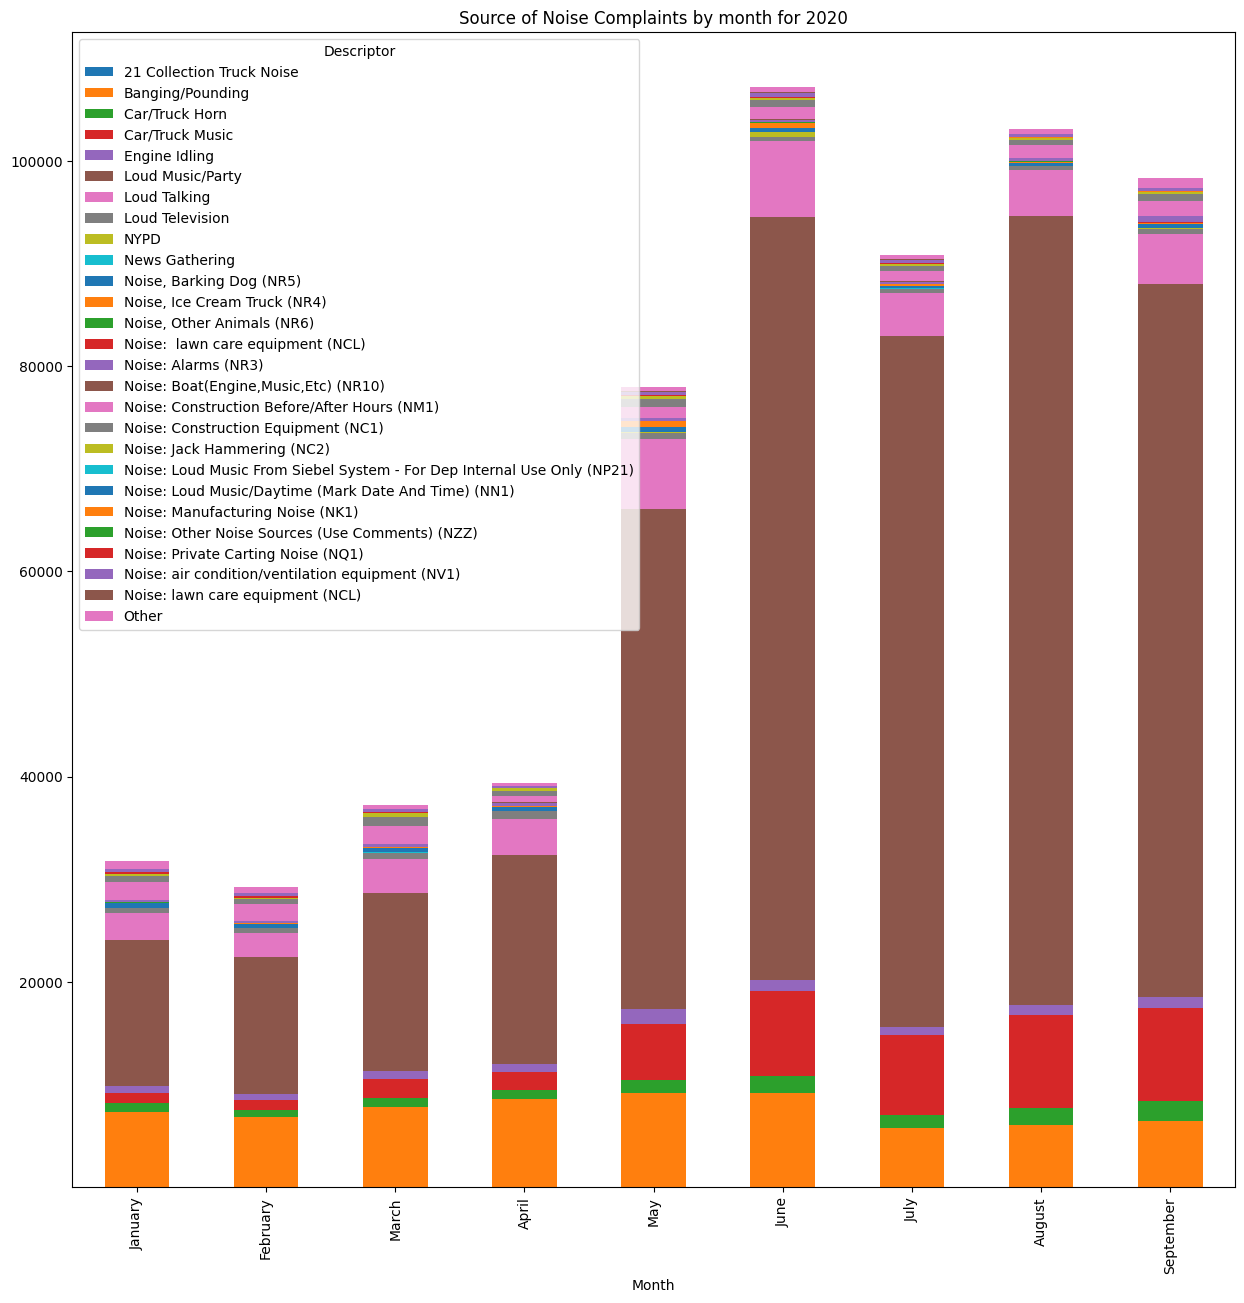

In [169]:
fig, ax = plt.subplots(figsize=(15,15))
pivot_data.plot(kind='bar', stacked=True, ax=ax)
plt.title('Source of Noise Complaints by month for 2020')
plt.show()

### Task 2: Urban Rodents

Prompt: The Departments of Sanitation and Health would like to know the where in the city rats and mice are most likely to create sanitation issues. In discussion with them, you determine that they aren’t thinking in terms of geography, but more in terms of the kinds of buildings/properties/structures we find around a city.

In [161]:
df['Complaint Type'].unique()

array(['Damaged Tree', 'Dead/Dying Tree',
       'NonCompliance with Phased Reopening',
       'For Hire Vehicle Complaint', 'Highway Condition',
       'Sidewalk Condition', 'Bridge Condition', 'Street Light Condition',
       'Homeless Person Assistance', 'Street Sign - Missing',
       'Overgrown Tree/Branches', 'Food Establishment', 'Ferry Inquiry',
       'Traffic Signal Condition', 'Maintenance or Facility',
       'Noise - Residential', 'Street Condition',
       'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Noise - Park',
       'Rodent', 'Illegal Fireworks', 'Traffic', 'Illegal Parking',
       'Violation of Park Rules', 'Broken Parking Meter',
       'New Tree Request', 'Abandoned Vehicle', 'Mobile Food Vendor',
       'Homeless Street Condition', 'Municipal Parking Facility',
       'Urinating in Public', 'Drug Activity', 'Ferry Complaint',
       'Animal in a Park', 'Vending', 'Non-Emergency Police Matter',
       'Root/Sewer/Sidewalk Condition', 'Water System',
       'St

We might want to focus on the rows that have 'Rodent' as their complaint type

In [162]:
rodent_df = df.loc[df['Complaint Type'] == 'Rodent']

In [163]:
rodent_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Boruogh,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Mentions Noise
111,46829542,07/11/2020 08:42:14 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11106,31 DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.1123853,-77.5195844,"(40.1123853, -77.5195844)",False
299,46907472,07/19/2020 10:47:14 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11233,MACDOUGAL STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.1123853,-77.5195844,"(40.1123853, -77.5195844)",False
562,47002583,07/27/2020 05:46:49 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11220,50 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.1123853,-77.5195844,"(40.1123853, -77.5195844)",False
2043,45284912,01/01/2020 09:43:38 PM,01/02/2020 04:48:08 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10451,303 EAST 158 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.8230711,-73.9173101,"(40.8230711, -73.9173101)",False
2063,45285009,01/01/2020 07:09:39 PM,01/07/2020 04:59:57 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11215,585 7 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.6664172,-73.9770565,"(40.6664172, -73.9770565)",False


To perform this task we will look at the Location Type column, as this best describes the prompt, where we want to figure out which type of building leads to the most rodent infestations

In [164]:
grp_building_type = rodent_df.groupby(by=['Location Type'], as_index=False).size()

In [165]:
grp_building_type

,Location Type,size
0,1-2 Family Dwelling,5042
1,1-2 Family Mixed Use Building,404
2,1-3 Family Dwelling,1
3,1-3 Family Mixed Use Building,3
4,3+ Family Apartment Building,179
5,3+ Family Apt. Building,9032
6,3+ Family Mixed Use Building,1007
7,Apartment,20
8,Building (Non-Residential),6
9,Cafeteria - Public School,2


In [166]:
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

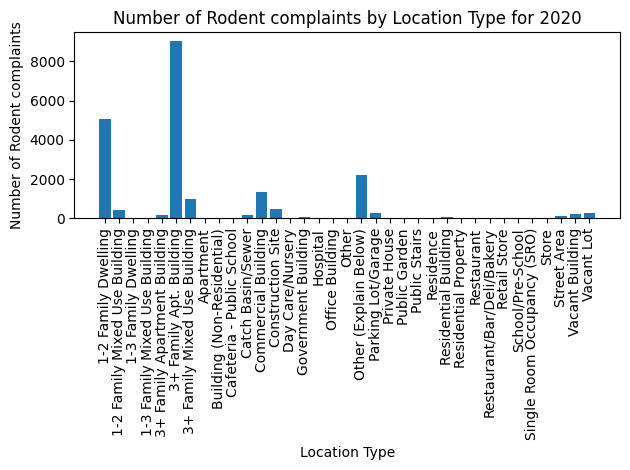

In [168]:
plt.figsize=(100,100)
plt.bar(grp_building_type['Location Type'], grp_building_type['size'])
plt.xticks(rotation=90)
plt.xlabel('Location Type')
plt.ylabel('Number of Rodent complaints')
plt.title('Number of Rodent complaints by Location Type for 2020')
plt.tight_layout()
plt.show()